## Introduction

This dataset provides information about patients and their risk factors for stroke. It contains various attributes related to demographics, medical history and lifestyle factors.

This notebook provides Exploratory Data Analysis (EDA), and cleaning steps based on EDA.

## Prepare for analysis

### Load packages and the dataset

In [25]:
from data.load_data import load_data
from data_preparation.preprocessing import (
    describe_data,
    detect_missing_values,
    most_frequent_values,
    unique_values,
)
from data_preparation.plotting import (
    plot_distributions,
    plot_target_distribution,
    plot_correlation_matrix,
    plot_feature_vs_target,
    plot_categorical_vs_target
)
from data_preparation.data_cleaning_summary import (
    handle_missing_values,
    handle_outliers,
    remove_unrepresentative_rows,
    merge_work_types,
    save_to_parquet
)


## Preliminary data inspection

### Quick glimpse of the data

In [26]:
df = load_data("data/raw_data/raw_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Explore the dataset

In [27]:
# Describe the data
print(describe_data(df))

                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110  

In [28]:
# Display column data types
print("Data Types:")
print(df.dtypes)

Data Types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


The dataset contains 12 attributes, with a mix of:


Numerical columns: id, age, hypertension, heart_disease, avg_glucose_level, bmi, and stroke.

Categorical columns: gender, ever_married, work_type, Residence_type, and smoking_status.

## Few statistics on the data

### missing values

In [29]:
print(detect_missing_values(df))

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


bmi has 201 missing values out of a total of 5110 rows, while all other columns have no missing values.

### most frequent data

In [30]:
print(most_frequent_values(df))

                       id  gender    age hypertension heart_disease  \
Total                5110    5110   5110         5110          5110   
Most Frequent Item  44679  Female   78.0            0             0   
Frequency               1    2994    102         4612          4834   
Percent of Total     0.02  58.591  1.996       90.254        94.599   

                   ever_married work_type Residence_type avg_glucose_level  \
Total                      5110      5110           5110              5110   
Most Frequent Item          Yes   Private          Urban             93.88   
Frequency                  3353      2925           2596                 6   
Percent of Total         65.616    57.241         50.802             0.117   

                      bmi smoking_status  stroke  
Total                4909           5110    5110  
Most Frequent Item   28.7   never smoked       0  
Frequency              41           1892    4861  
Percent of Total    0.835         37.025  95.127 

### unique values

In [31]:
print(unique_values(df))

                 id  gender   age  hypertension  heart_disease  ever_married  \
Total          5110    5110  5110          5110           5110          5110   
Unique Values  5110       3   104             2              2             2   

               work_type  Residence_type  avg_glucose_level   bmi  \
Total               5110            5110               5110  4909   
Unique Values          5               2               3979   418   

               smoking_status  stroke  
Total                    5110    5110  
Unique Values               4       2  


### outliers

The continuous variables avg_glucose_level and bmi are likely to have outliers because of the wide distribution of their values.

Check the distributions of avg_glucose_level and bmi for outliers or extreme values.

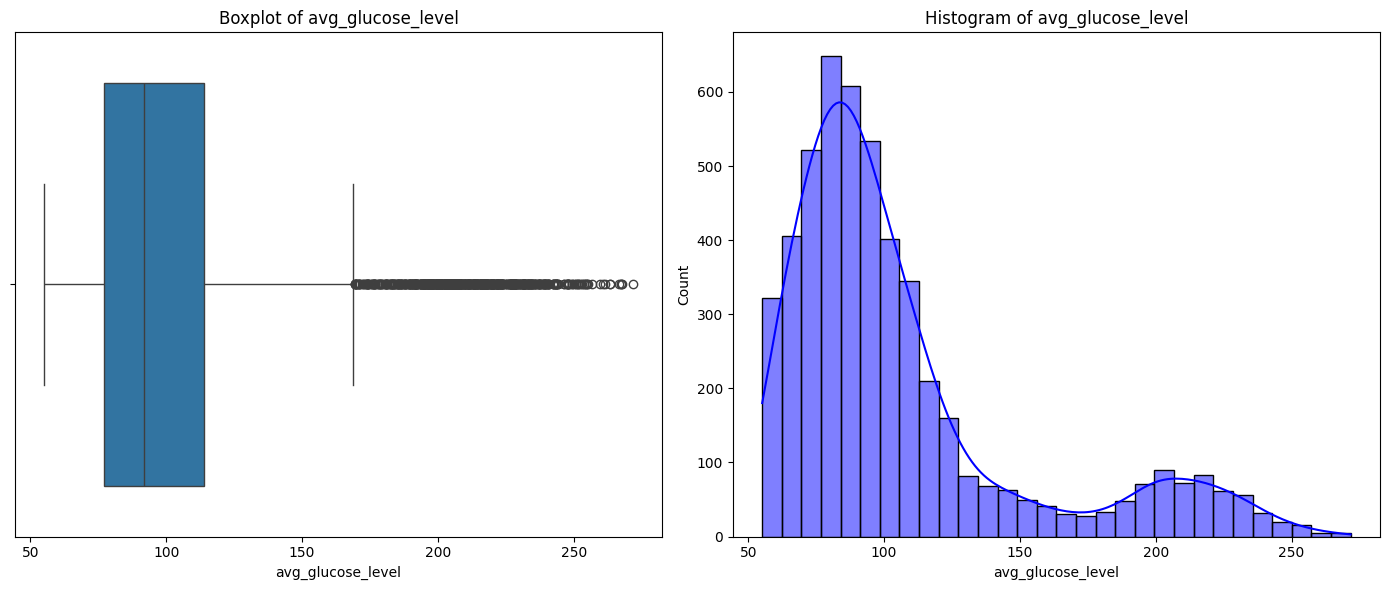

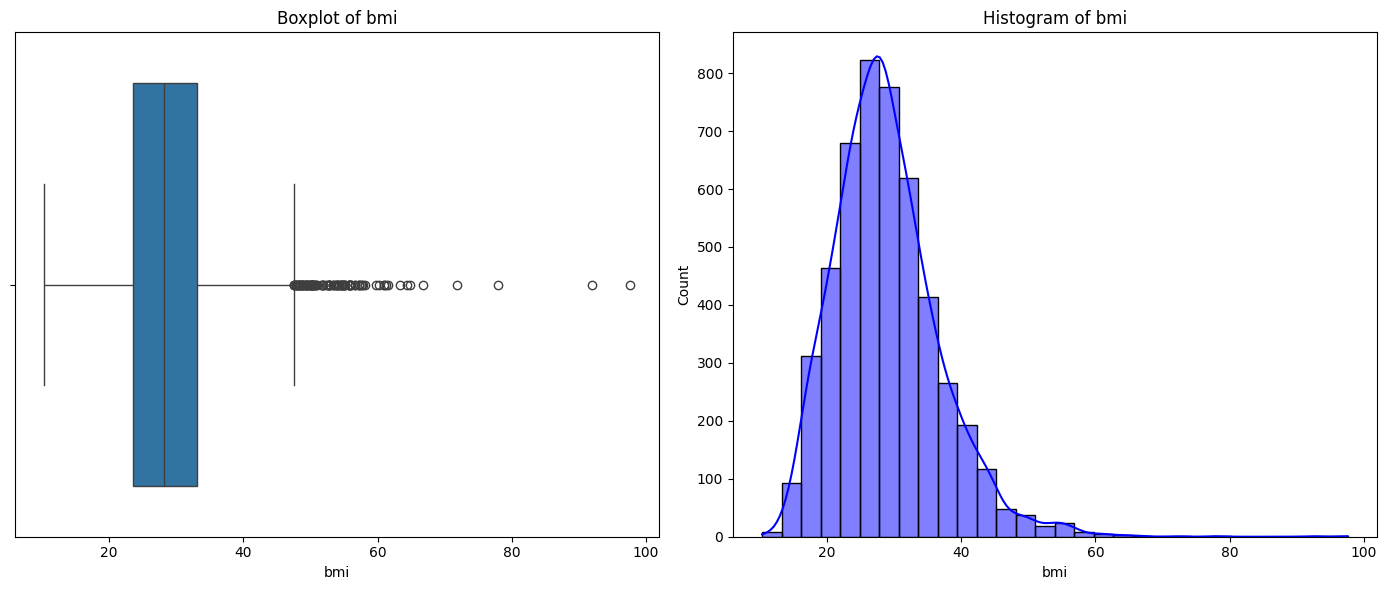

In [32]:
plot_distributions(df, "avg_glucose_level")
plot_distributions(df, "bmi")

1. avg_glucose_level

The box plot shows a large number of outliers at the high end (above about 150). The histogram shows that the distribution exhibits two normal distributions. This is consistent with medical facts. People with an average blood glucose value of 150 or more are usually diagnosed as having diabetes (type 1 or type 2). So people with and without diabetes each form a normal distribution.

2. bmi

The boxplot shows extreme values range beyond 50 and even close to 100, which are biologically unusual. The distribution is close to normal, peaking around 25–30, which is expected for BMI data. There is an outlier problem in bmi at the high end, and since the extreme values are biologically unusual, we consider removing them.

## Exploratory data analysis

### distribution of the target variable: "stroke"

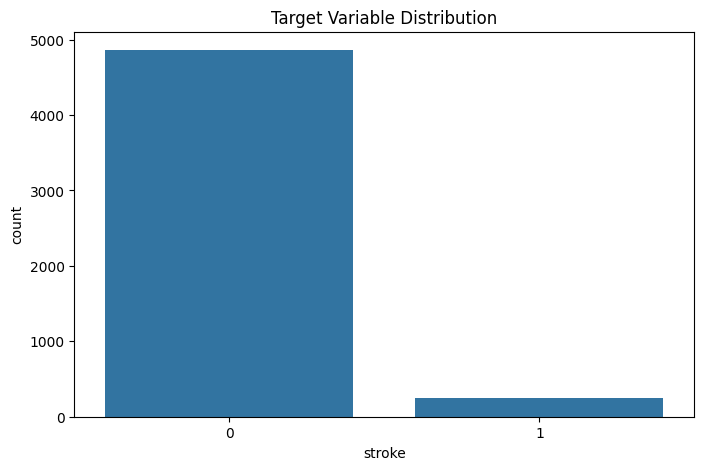

In [33]:
plot_target_distribution(df, target_column="stroke")

Stroke = 0 in most cases (patients who did not have a stroke), and stroke = 1 in only a small percentage of cases (patients who had a stroke).

### analyse feature correlation

### numerical features analysis

id is a unique identifier for each patient, and it does not contribute to the prediction task.
It will not be used in the analysis or modeling process and can be excluded.


Plotting Correlation Matrix for Numerical Features


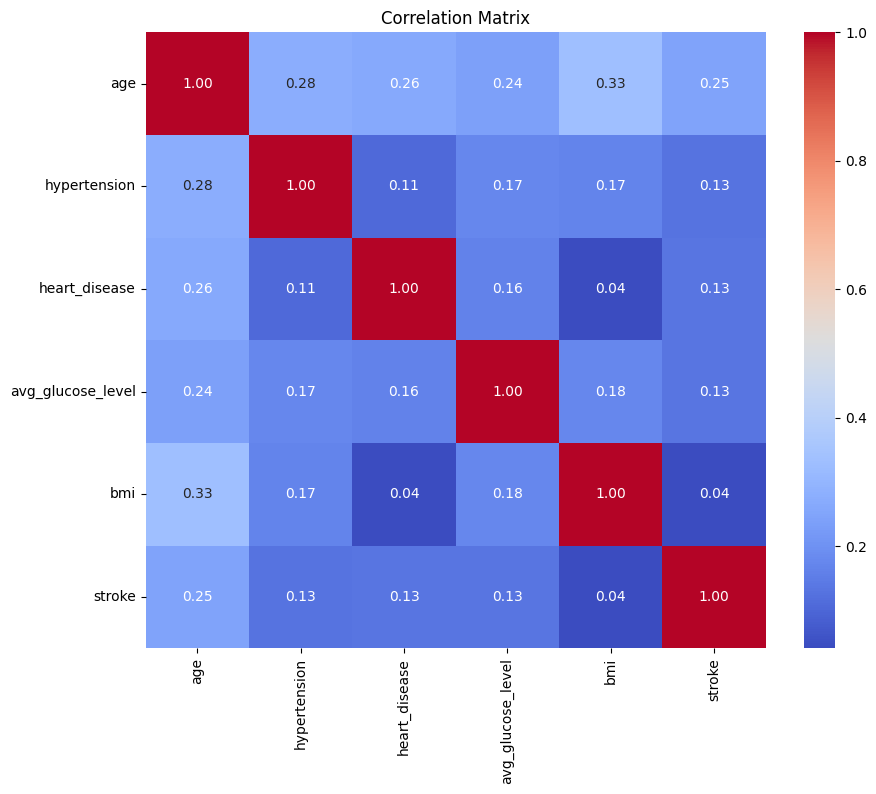

Plotting Numerical Features against Target Variable (stroke)


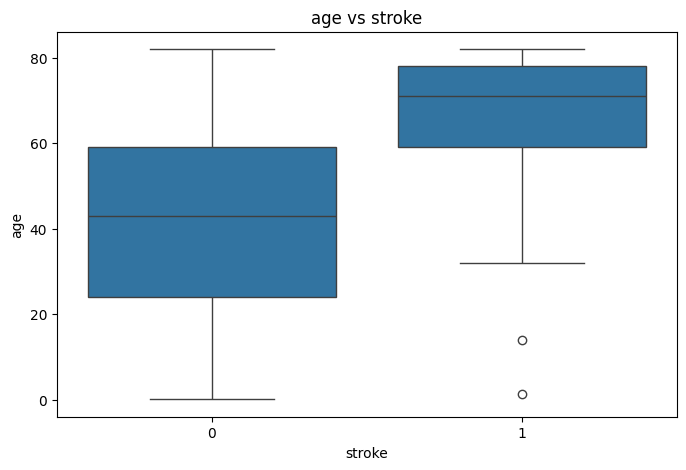

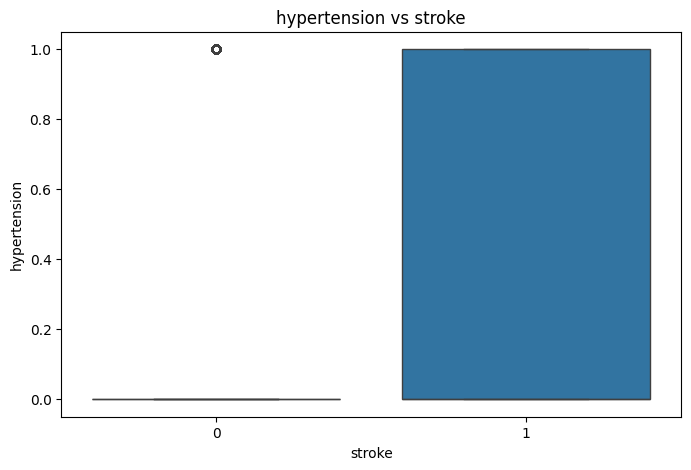

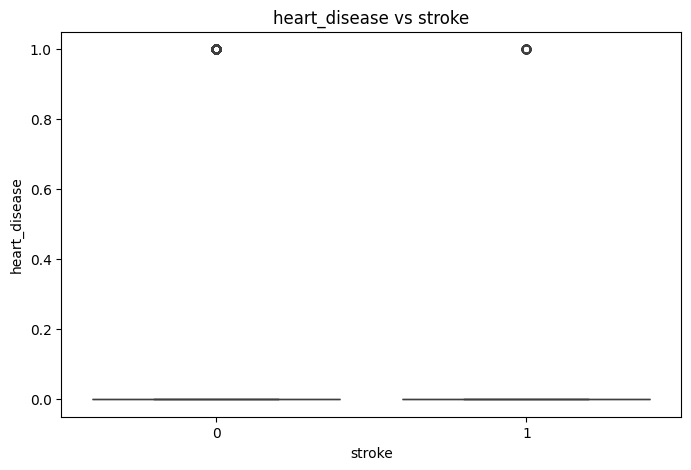

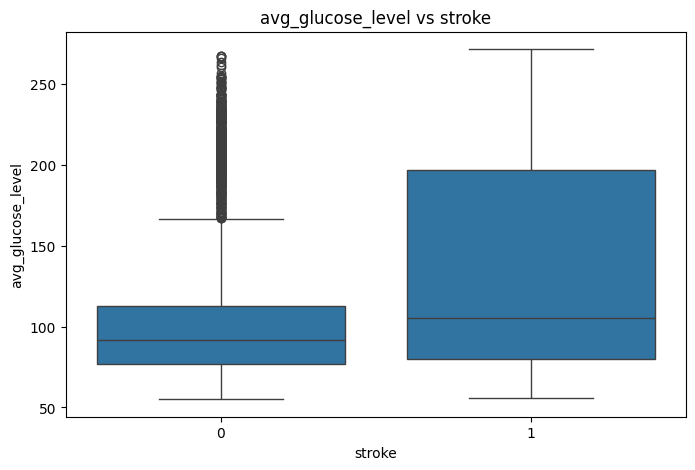

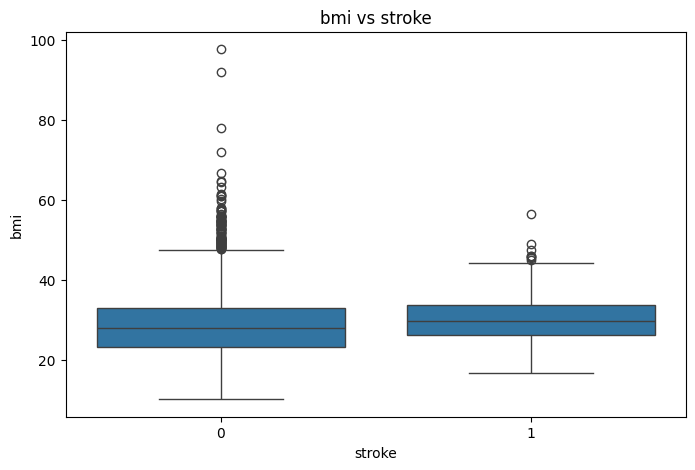

In [34]:
numerical_features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]
# Correlation Matrix
print("Plotting Correlation Matrix for Numerical Features")
plot_correlation_matrix(df[numerical_features])
# Numerical Features vs Target
print("Plotting Numerical Features against Target Variable (stroke)")
for feature in numerical_features:
    if feature != "stroke":  # Exclude the target variable from the loop
        plot_feature_vs_target(df, feature=feature, target="stroke")

Correlation Matrix

Age was moderately positively correlated (~0.25) with the target variable (stroke), suggesting that older people are more likely to have a stroke.


Hypertension, heart disease, and average blood glucose level (avg_glucose_level) had a weaker positive correlation with stroke (~0.13), but these characteristics still had some predictive power.


Body mass index (BMI) was slightly correlated with stroke (~0.04), suggesting that people with a higher body mass index (BMI) or blood glucose level may be at higher risk.

Feature vs. Target Analysis

1. Age and stroke

The box plot shows that stroke patients tend to have a higher median age. This is consistent with the correlation matrix and emphasises that age is an important predictive feature.

2. Hypertension vs Stroke

In the stroke group, the prevalence of hypertension was higher. This suggests that hypertension is an important feature in predicting stroke.

3. Heart Disease vs Stroke

The boxplot suggests that heart disease alone is not a strong distinguishing factor for stroke prediction.

4. Avg Glucose Level vs Stroke

The average blood glucose level is significantly higher in stroke patients. This suggests that average blood glucose levels may be associated with stroke prediction.

5. BMI vs Stroke

 The mbi index was slightly higher in stroke patients, but the difference was not significant when compared with other characteristics such as Age. Outliers were present in both groups and may need to be addressed.

### categorical features analysis

Plotting Categorical Features against Target Variable (stroke)


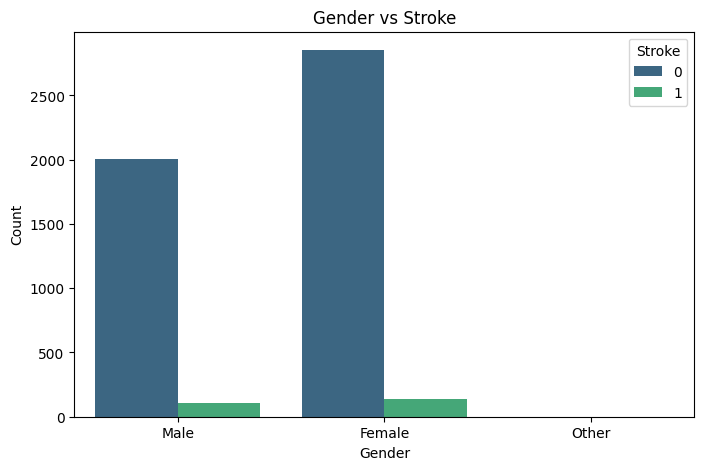

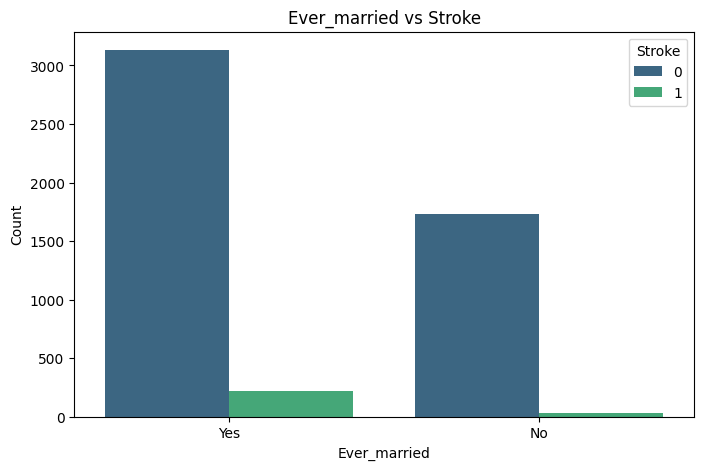

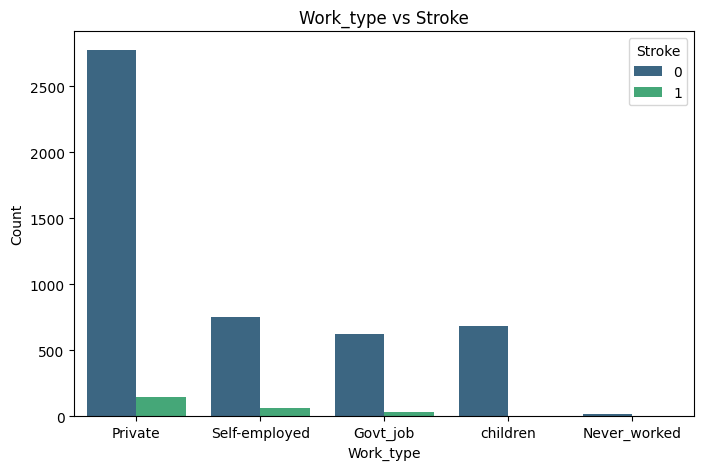

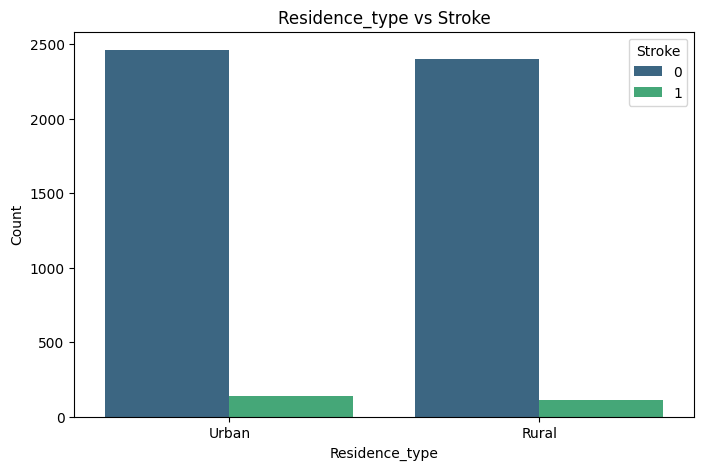

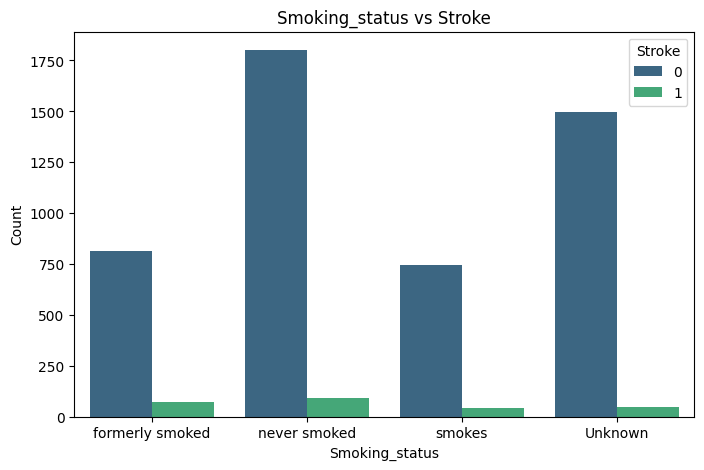

In [35]:
categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
print("Plotting Categorical Features against Target Variable (stroke)")
for feature in categorical_features:
    plot_categorical_vs_target(df, categorical_feature=feature, target="stroke")

1. Gender vs Stroke

There doesn't appear to be a significant distinction in the stroke distribution between Male and Female genders. Both genders have a higher proportion of non-stroke cases (target = 0) compared to stroke cases (target = 1).

The count for "Other" gender is very low, we suspect it could be outlier and be cleaned.

In [36]:
gender_other_count = df[df['gender'] == 'Other'].shape[0]
print(gender_other_count)


1


The count for "Other" gender is only 1, we treat it as noise.

2. Ever_married vs Stroke

There doesn't appear to be a significant distinction in the stroke distribution between married and not married. Both groups have a higher proportion of non-stroke cases (target = 0) compared to stroke cases (target = 1).

3. Work_type vs Stroke

Patients in the "Private" category dominate the dataset, both in terms of stroke and non-stroke cases.
Categories like "Self-employed" and "Govt_job" have smaller, but significant, stroke counts relative to their total populations.
"Never_worked" and "children" categories show very few cases overall, limiting their impact on predictive modeling.

4. Residence_type vs Stroke

Urban and Rural residence types have a similar distribution for stroke cases, suggesting no immediate and strong correlation between residence type and the likelihood of stroke.

5. Smoking_status vs Stroke

A significant number of "Unknown" cases may reduce the reliability of this feature in predictive modeling. Further investigation may be needed to handle or interpret these unknown values effectively.

## Data cleaning

### handling missing values

Remove rows with missing BMI

In [37]:
df = handle_missing_values(df, column="bmi", replacement_value=None)

Impute "unknown" in smoking_status with the most frequent category

In [38]:
df = handle_missing_values(df, column="smoking_status", replacement_value="Unknown")

### handling outliers

BMI: Remove extreme values beyond 50

In [39]:
df = handle_outliers(df, column="bmi", threshold=50)

### correcting and simplifying categories

Merge "Never_worked" and "children" in work_type as "Never_worked"

In [40]:
df = merge_work_types(df, column="work_type", values_to_merge=["children"], new_value="Never_worked")

Remove "Other" in Gender

In [1]:
df = remove_unrepresentative_rows(df, column="gender", valid_values=["Male", "Female"])

NameError: name 'remove_unrepresentative_rows' is not defined

### summary of data cleaning

In [42]:
print("Shape of cleaned dataset:", df.shape)

Shape of cleaned dataset: (4829, 12)


### Save the cleaned dataset as a .parquet file

In [43]:
prepared_data_path = "data/prepared_data.parquet"  
save_to_parquet(df, prepared_data_path)

### Display the head of the cleaned dataset

In [44]:
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1  
